# Salary Predictor

In this notebook we're gonna predict employee salaries from different employee features. ```Multi-linear regression``` will be used to predict employee salaries.<br>

## Overview

* Data Collection
* Cleaning Data
* Correlation 
* Model
* Conclusion



We will start by importing the packages that will be required to run this notebook which include:
* Pandas
* Seaborn
* Scikit Learn
* Statsmodels
* Scipy

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

### Data Collection

Our data is stored in a csv file ```salary.csv```. We import our data to the notebook into a dataframe. The dataframe consists of the following columns: salary, exprior, yearsworked, yearsrank, market, degree, otherequal, position, male, Field, yearsabs.

In [2]:
salary = pd.read_csv('salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In addition to our data we will import our data's meta data decribing each columns type and explaining each column what it's about and what each value means.

In [3]:
salary_meta = pd.read_csv('Salary metadata.csv', delimiter=';')
salary_meta

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [4]:
salary_meta['Explanation'].iloc[7]

'Position (1 = Junior Employee, 2 = Manager, 3 = Executive)'

In [5]:
salary_meta['Explanation'].iloc[4]

'Market value (1 = salary at market value for position, <1 salary lower than market value for position, >1 salary higher than market value for position)'

### Cleaning Data



In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [7]:
salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [8]:
salary['position'].unique()

array([1, 2, 3], dtype=int64)

for pos in salary['position'].unique():
    print(f"{salary[(salary.position == pos)]['salary'].isnull().sum()} - {pos}")
    name = 'pos'+str(pos)
    exec('%s = %d' % (name, salary[(salary.position == pos)]['salary'].isnull().sum()))

p1

In [9]:
def find_null_postition(df):
    for pos in df['position'].unique():
        if df[(df.position == pos)]['salary'].isnull().sum():
            return pos

In [10]:
pos = find_null_postition(salary)
pos #3 - Executive

3

In [11]:
fill = salary[salary.position == pos]['salary'].mean()
fill

61180.2712984762

In [12]:
salary['salary'].fillna(fill, inplace=True)

C:\Users\Aspire\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


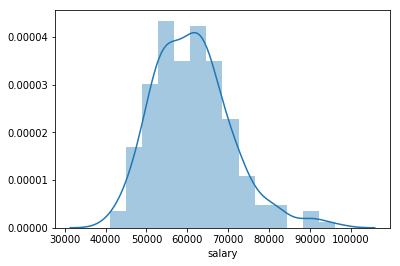

In [13]:
sns.distplot(salary[salary.position == pos]['salary'])

In [14]:
salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50883.292182,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12680.930483,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60387.750000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [15]:
salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.118900,0.624102,0.610916,0.406749,0.044825,0.166678,0.702580,0.362127,-0.496095,-0.070139
exprior,0.118900,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.624102,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610916,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.406749,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044825,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.166678,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.702580,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.362127,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.496095,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


In [16]:
sns.set(color_codes=True)

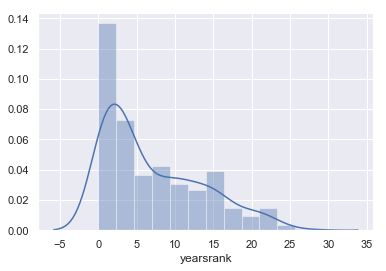

In [17]:
sns.distplot(salary.yearsrank)

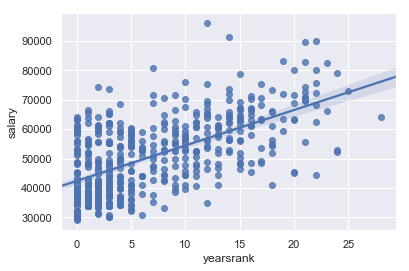

In [18]:
sns.regplot(x='yearsrank', y='salary', data=salary)

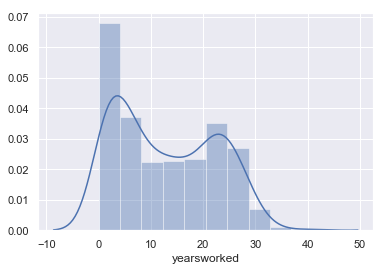

In [19]:
sns.distplot(salary.yearsworked)

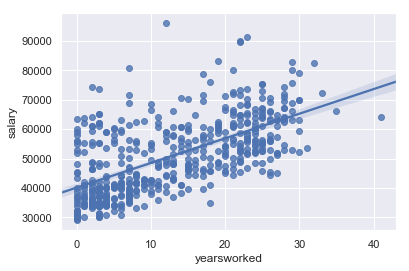

In [20]:
sns.regplot(x='yearsworked', y='salary', data=salary)

In [21]:
pearsonr(salary['yearsworked'], salary['salary'])

(0.624102296641541, 7.680408806634552e-57)

In [22]:
pearsonr(salary['yearsrank'],salary['salary'])

(0.6109158267807664, 6.62988413817198e-54)

In [23]:
salary_processed = pd.get_dummies(salary, prefix_sep='__', columns=['position','Field'])

In [24]:
salary_processed.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,male,yearsabs,position__1,position__2,position__3,Field__1,Field__2,Field__3,Field__4
0,53000.0,0,0,0,1.17,1,0,1,0,1,0,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,0,1,0,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,2,1,0,0,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,0,0,0,1


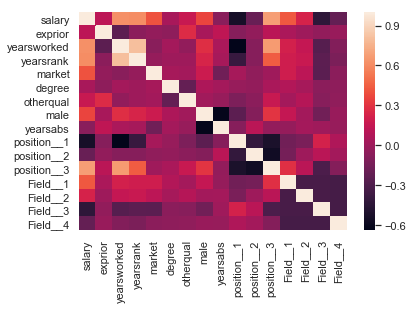

In [25]:
sns.heatmap(salary_processed.corr())

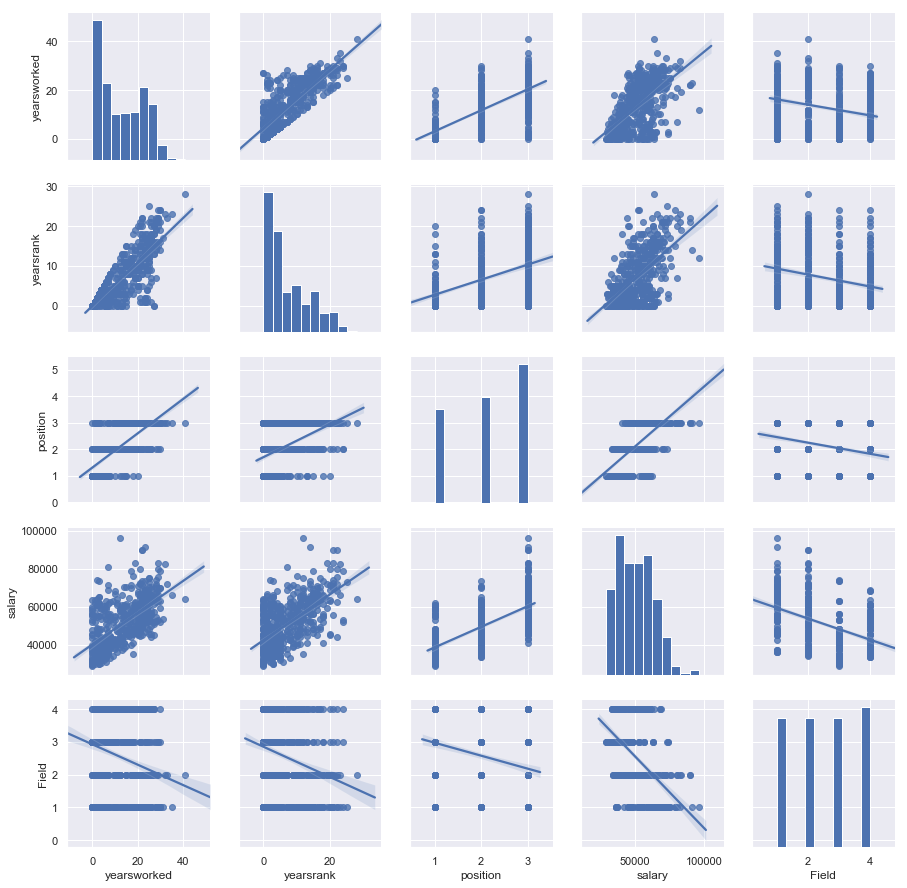

In [26]:
sns.pairplot(salary[['yearsworked','yearsrank','position','salary', 'Field']], kind='reg')

In [27]:
X = salary[['yearsworked','yearsrank']]
y = salary['salary']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [29]:
model = sm.OLS(y_train, X_train).fit()

In [30]:
prediction = model.predict(X_test)

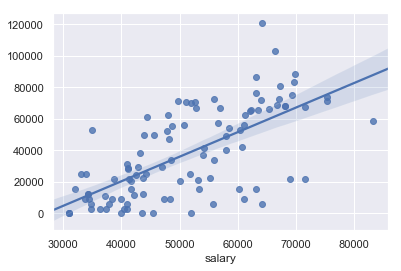

In [31]:
sns.regplot(x=y_test, y=prediction)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     652.5
Date:                Fri, 11 Oct 2019   Prob (F-statistic):          5.57e-128
Time:                        07:43:27   Log-Likelihood:                -4755.0
No. Observations:                 411   AIC:                             9514.
Df Residuals:                     409   BIC:                             9522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2621.1726    200.043     13.103      0.000    2227.932    3014.413
yearsrank     478.6229    335.578      1.426      0.155    -181.049    1138.295
==============================================================================
Omnibus:                       10.485   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                5.649
Skew:                           0.005   Prob(JB):                       0.0593
Kurtosis:                       2.426   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
predicted = pd.concat([X_test, y_test, prediction], axis=1)
predicted.rename(columns={0:'Prediction'}, inplace=True)
predicted['Residual'] = predicted['salary'] - predicted['Prediction']
predicted.head()

,yearsworked,yearsrank,salary,Prediction,Residual
302,19,13,61123.0,56024.377319,5098.622681
115,9,3,34000.0,25026.422191,8973.577809
273,23,12,65432.0,66030.444851,-598.444851
164,5,5,60190.0,15498.977564,44691.022436
457,9,2,42603.0,24547.799287,18055.200713


In [34]:
Residual = y_test - prediction

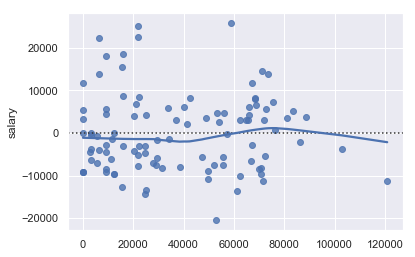

In [35]:
sns.residplot(x=prediction, y=y_test, lowess=True)

In [36]:
model_test = sm.OLS(y_test, X_test).fit()

In [37]:
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     160.5
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           4.34e-32
Time:                        07:43:28   Log-Likelihood:                -1192.1
No. Observations:                 103   AIC:                             2388.
Df Residuals:                     101   BIC:                             2393.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2282.8311    436.837      5.226      0.000    1416.264    3149.398
yearsrank     923.4472    723.805      1.276      0.205    -512.388    2359.282
==============================================================================
Omnibus:                        1.762   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.661
Skew:                          -0.307   Prob(JB):                        0.436
Kurtosis:                       2.895   Cond. No.                         6.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""